<a href="https://colab.research.google.com/github/VolkhinD/cancer/blob/main/Researching_models_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Undestanding Machine Learning Models**

In [34]:
%%capture
!pip install lime
!pip install shap
!pip install interpret

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn

import shap

from interpret.glassbox import LogisticRegression
from interpret import show

# Begginning

In [36]:
path = '/content/drive/MyDrive/Data/cancer_data.csv'

whole_data = pd.read_csv(path)
y = whole_data.diagnosis

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] # or list(set(data.columns))

whole_data = whole_data[features + ['diagnosis']]
data = whole_data[features]
y = y.map(lambda p: 1 if p == 'M' else 0)



'Diagnosis' is the column which we are going to predict , which says if the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign. 

In [37]:
# data a liitle unbalanced but it's OK
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [38]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.15, shuffle=True, random_state=2)

In [39]:
data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

# Scale Data

In [40]:
scaler = StandardScaler()
scaler.fit(data_train)
data_train_scale = scaler.transform(data_train)
data_test_scale = scaler.transform(data_test)
data_scale = scaler.transform(data)

#  Logistic Regression

In [85]:
reg = sklearn.linear_model.LogisticRegression()
reg.fit(data_train_scale, y_train)

LogisticRegression()

In [86]:
print(classification_report(y_train, reg.predict(data_train_scale)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       304
           1       0.99      0.98      0.99       179

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



In [87]:
print(classification_report(y_test, reg.predict(data_test_scale)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.94      0.97      0.96        33

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



Recall on train: 0.98  \
Recall on test: 0.97. \
Not bad:)

### Lime

In [44]:
import lime
from lime import lime_tabular

In [45]:
reg.predict_proba(data_test_scale[(72, ),:])

array([[0.99695124, 0.00304876]])

In [46]:
y_reg_pred = reg.predict(data_test_scale)
sum(y_test == y_reg_pred)

83

So it's 3 cases which give wrong prediction.

In [47]:
print(f'The first index of incorrect prediction is {np.array((y_test == y_reg_pred)).argmin()}')
print(f'Correct value is {y_test.iloc[37]}')
print(f'Predicted value is {y_reg_pred[37]}')

The first index of incorrect prediction is 37
Correct value is 1
Predicted value is 0


In [48]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(data_train_scale),
    feature_names=features,
    class_names=[0, 1],
    mode='classification')

exp = explainer.explain_instance(
    data_row=pd.DataFrame(data_test_scale, columns=features).iloc[37], 
    predict_fn=reg.predict_proba
)

exp.show_in_notebook(show_table=True)

So LIME sees 4 features which resposible for cancer and they level out by many other weak features

### Feature Importance

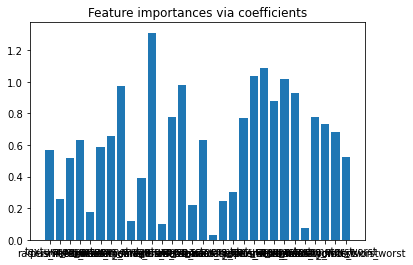

In [88]:
importance = np.abs(reg.coef_)
plt.bar(height=importance.squeeze(), x=features, width=0.8)
plt.title("Feature importances via coefficients")
plt.show()

<BarContainer object of 30 artists>

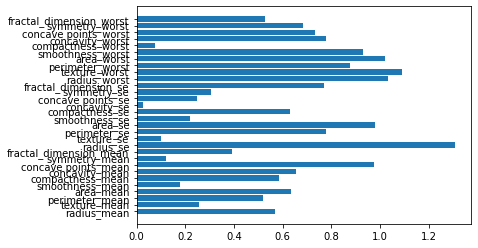

In [89]:
plt.barh(features, importance.squeeze(), align='center')

In [92]:
importance_dict = dict(zip(features, importance.squeeze()))
sorted(importance_dict.items(), key=lambda x: x[1])[:-11:-1]

[('radius_se', 1.310517354475651),
 ('texture_worst', 1.0899984399242568),
 ('radius_worst', 1.0348960759909014),
 ('area_worst', 1.0204962095673213),
 ('area_se', 0.9814063958284392),
 ('concave points_mean', 0.9744133298062302),
 ('smoothness_worst', 0.9321197804325472),
 ('perimeter_worst', 0.8779552948851438),
 ('perimeter_se', 0.780433580800312),
 ('concavity_worst', 0.7789226558246478)]

There are so many important features, seems model uses almost all features

#### Explain Local


In [54]:
lr = LogisticRegression(random_state=2021, feature_names=features, penalty='l1', solver='liblinear')
lr.fit(data_train_scale, y_train)
lr_local = lr.explain_local(data_test_scale[:100], y_test[:100], name='Logistic Regression')
show(lr_local)

In [55]:
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

# Overfitted Model: Random Forest



In [56]:
rf_model = RandomForestClassifier(random_state=21, n_jobs=-1, n_estimators=200) 
rf_model.fit(data_train, y_train)

rf_predictions = rf_model.predict(data_test)
train_predictions = rf_model.predict(data_train)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_train_accuracy = accuracy_score(y_train, train_predictions)

print("Basic Model Train Accuracy is {}".format(rf_train_accuracy))
print("Basic Model Test Accuracy is {}".format(rf_accuracy))


Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.9302325581395349


In [57]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.89      0.94      0.91        33

    accuracy                           0.93        86
   macro avg       0.92      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86



In [58]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       179

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



### Analize feature importance using built-in Scikit-Learn Methods
>> Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. [Source](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [59]:
importances = np.around((rf_model.feature_importances_)*100, decimals=1)
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances_model = pd.Series(importances, index=features)
print(f'Importances already normalized {importances.sum()}')

Importances already normalized 99.79999999999998


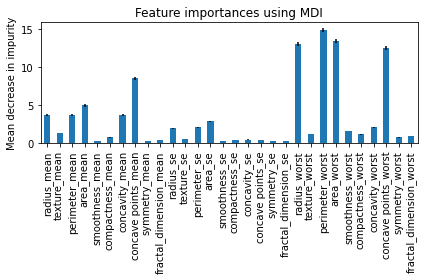

In [60]:
fig, ax = plt.subplots()
forest_importances_model.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<BarContainer object of 30 artists>

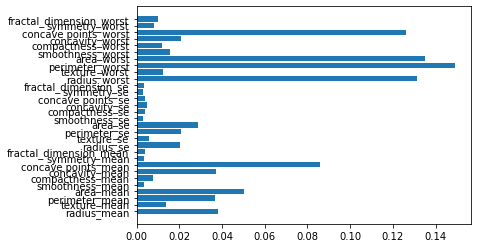

In [61]:
plt.barh(features, rf_model.feature_importances_, align='center')

The first 13 features which give the biggest inpact

In [62]:
forest_importances_model.sort_values(ascending=False).head(13)

perimeter_worst         14.9
area_worst              13.5
radius_worst            13.1
concave points_worst    12.6
concave points_mean      8.6
area_mean                5.0
radius_mean              3.8
perimeter_mean           3.7
concavity_mean           3.7
area_se                  2.9
concavity_worst          2.1
perimeter_se             2.1
radius_se                2.0
dtype: float64

###Feature importance based on feature permutation
>> Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [63]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model, data_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
norm_result = np.around((result.importances_mean / result.importances_mean.sum()) * 100, decimals=1)

forest_importances_permutation = pd.Series(norm_result, index=features)

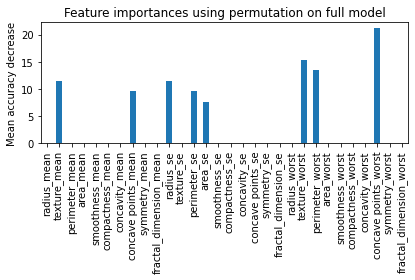

In [64]:
fig, ax = plt.subplots()
forest_importances_permutation.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Choose Best Features


In [65]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest()
selector.fit(data_train, y_train)
params_best = selector.feature_names_in_
sk_scores = np.around(selector.scores_ / selector.scores_.sum() * 100, decimals=1)
forest_importances_kb = pd.Series(sk_scores, index=features)

Chech how new features work with the same Random Forest model

In [66]:
X_sk = data_train[params_best]
X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(data_train, y_train, random_state=1, test_size=0.2)
rf_model.fit(X_sk_train, y_sk_train)

rf_sk_predictions = rf_model.predict(X_sk_test)
train_sk_predictions = rf_model.predict(X_sk_train)

rf_imp_accuracy = accuracy_score(y_sk_test, rf_sk_predictions)
rf_imp_train_accuracy = accuracy_score(y_sk_train, train_sk_predictions)

print("Basic Model Train Accuracy is {}".format(rf_imp_train_accuracy))
print("Basic Model Test Accuracy is {}".format(rf_imp_accuracy))

Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.9690721649484536


In [67]:
print(classification_report(y_sk_test, rf_sk_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.97      0.95      0.96        38

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97



#### Create DataFrame if Important Features

In [68]:
if_dict = {
    'from_model': forest_importances_model,
    'permuntations': forest_importances_permutation,
    'select_k_best': forest_importances_kb
}
importante_features_df = pd.DataFrame(if_dict)
importante_features_df['sum_of_all'] = importante_features_df.sum(axis=1)

In [78]:
importante_features_df.sort_values('sum_of_all', ascending=False)

from_model  permuntations  select_k_best  sum_of_all
concave points_worst           12.6           21.2            9.9        43.7
perimeter_worst                14.9           13.5            9.4        37.8
concave points_mean             8.6            9.6            9.0        27.2
radius_worst                   13.1            0.0            9.1        22.2
area_worst                     13.5            0.0            7.1        20.6
texture_worst                   1.2           15.4            1.5        18.1
radius_se                       2.0           11.5            2.8        16.3
perimeter_se                    2.1            9.6            2.6        14.3
texture_mean                    1.4           11.5            1.1        14.0
area_se                         2.9            7.7            2.4        13.0
perimeter_mean                  3.7            0.0            7.3        11.0
area_mean                       5.0            0.0            5.9        10.9
radius_mean                     3.8            0.0            6.8        10.6
concavity_mean                  3.7            0.0            6.2         9.9
concavity_worst                 2.1            0.0            4.6         6.7
compactness_worst               1.2            0.0            3.2         4.4
compactness_mean                0.8            0.0            3.3         4.1
smoothness_worst                1.6            0.0            1.3         2.9
symmetry_worst                  0.8            0.0            1.2         2.0
concave points_se               0.4            0.0            1.5         1.9
fractal_dimension_worst         1.0            0.0            0.7         1.7
smoothness_mean                 0.3            0.0            0.9         1.2
concavity_se                    0.5            0.0            0.6         1.1
symmetry_mean                   0.3            0.0            0.8         1.1
compactness_se                  0.4            0.0            0.6         1.0
texture_se                      0.6            0.0            0.0         0.6
fractal_dimension_se            0.3            0.0            0.1         0.4
fractal_dimension_mean          0.4            0.0            0.0         0.4
symmetry_se                     0.3            0.0            0.0         0.3
smoothness_se                   0.3            0.0            0.0         0.3

It's cleary seen that all methods consider 'radius_worst', 'area_worst', 'concave points_worst' as a very important features

### Use SHAP

Find incorrect prediction

In [70]:
print(f'The first index of incorrect prediction is {np.array((y_test == rf_predictions)).argmin()}')
print(f'Correct value is {y_test.iloc[0]}')
print(f'Predicted value is {rf_predictions[0]}')

The first index of incorrect prediction is 37
Correct value is 0
Predicted value is 0


In [71]:
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(data_train)

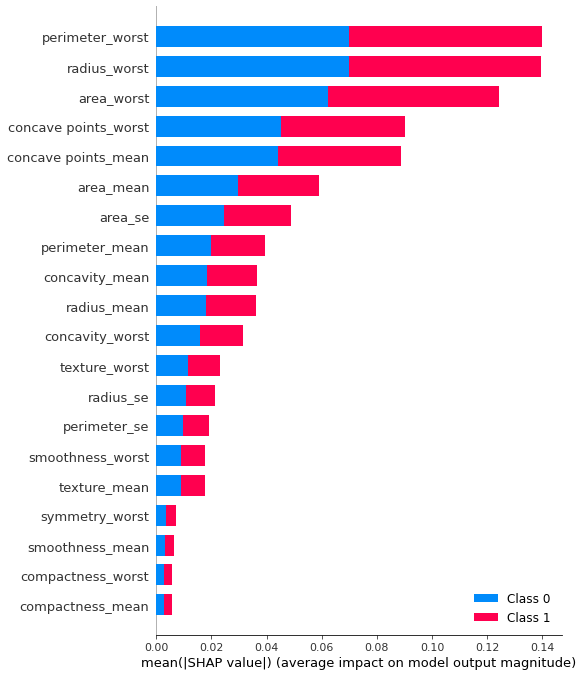

In [72]:
shap.summary_plot(shap_values_rf, data_train)

Let's compare this result to previous results took from sk-learn

In [73]:
importante_features_df.sum_of_all.sort_values(ascending=False)[:7]

concave points_worst    43.7
perimeter_worst         37.8
concave points_mean     27.2
radius_worst            22.2
area_worst              20.6
texture_worst           18.1
radius_se               16.3
Name: sum_of_all, dtype: float64

They are pretty much same, no surprise

In [74]:
# let's explain incorrect prediction 
# visualize the first prediction's explanation
shap.initjs()
shap_values_0 = explainer_rf.shap_values(data_test[0:1])
print(f'Predicted value is {rf_predictions[0]}')
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf[0][0, :], feature_names=features)

Predicted value is 0


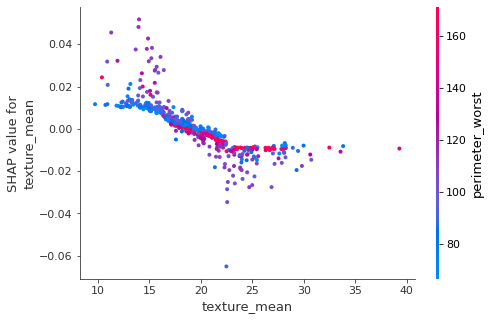

In [75]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
# better to itterate for most contribiution features
shap.initjs()
shap.dependence_plot(1, shap_values_rf[0], features=data_train, feature_names=features)

In [76]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf[0], feature_names=features)